### Named Entity Recognition using spaCy

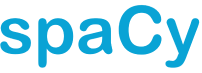

###Task :
    pretrained spacy model 'en_core_web_sm' can be used to tag entity names to sentence tokens.
    This model has its own entities and can't be applicable if requirement is custom.
    Model can be trained with our own customized data after refering to document, and can create custom entities.
    In this case, sentence or word will be provided as input. Output will refering to tokens tagged with entities (technical skill, domain)






References :
    
    spacy documentation :
    https://spacy.io/

    english pipeline models :
    https://spacy.io/models/en#en_core_web_sm
    https://spacy.io/models/en#en_core_web_lg



#### Import dependencies, appropreate model

In [ ]:
import spacy
from spacy.lang.en.examples import sentences

# !python -m spacy download en_core_web_lg
nlp_sm = spacy.load("en_core_web_sm")   # model trained on small data

In [ ]:
!python -m spacy download en_core_web_lg
nlp_lg = spacy.load("en_core_web_lg")   # model trained on large data

2023-08-26 09:51:00.331808: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
# Understand existing NER functionality of model

doc = nlp_lg(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_, token.ent_type_)

Apple is looking at buying U.K. startup for $1 billion
Apple PROPN nsubj ORG
is AUX aux 
looking VERB ROOT 
at ADP prep 
buying VERB pcomp 
U.K. PROPN dobj GPE
startup NOUN ccomp 
for ADP prep 
$ SYM quantmod MONEY
1 NUM compound MONEY
billion NUM pobj MONEY


In [ ]:
doc = nlp_lg("Java is programming language used in development.")
print(doc.ents[0] , type(doc), type(doc.ents[0]))


Java <class 'spacy.tokens.doc.Doc'> <class 'spacy.tokens.span.Span'>


In [ ]:
for token in doc:
  print(token.text, token.ent_type_)

Java GPE
is 
programming 
language 
used 
in 
development 
. 


In [ ]:
from spacy import displacy
doc = nlp_lg("Java is programming language used in development.")
displacy.render(doc,style ="ent",jupyter=True)

Conclusion : model is not able to predict the entities as per our requirement.

Requirement : Java should be recognized as technical skill


#### Prepareing data to train model

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tech_data = pd.read_excel('Technology Skills.xlsx')
tech_data

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
0,11-1011.00,Chief Executives,Adobe Systems Adobe Acrobat,43232202,Document management software,Y
1,11-1011.00,Chief Executives,AdSense Tracker,43232306,Data base user interface and query software,N
2,11-1011.00,Chief Executives,Atlassian JIRA,43232201,Content workflow software,Y
3,11-1011.00,Chief Executives,Blackbaud The Raiser's Edge,43232303,Customer relationship management CRM software,Y
4,11-1011.00,Chief Executives,ComputerEase Construction Accounting,43231601,Accounting software,N
...,...,...,...,...,...,...
27853,53-7111.00,Mine Shuttle Car Operators,Mine maintenance software,43232603,Facilities management software,N
27854,53-7121.00,"Tank Car, Truck, and Ship Loaders",CompuWeigh GMS,43232306,Data base user interface and query software,N
27855,53-7121.00,"Tank Car, Truck, and Ship Loaders",Data entry software,43232306,Data base user interface and query software,Y
27856,53-7121.00,"Tank Car, Truck, and Ship Loaders",Distributed control system DCS,43231506,Materials requirements planning logistics and ...,N


Above data can be used to collect technical skills and career domains from Example and Title column respectively.

In [ ]:
# All data is describing technical skills and domain where it is being used.
tech_data[tech_data['Example'].str.contains("java",case=False)]

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
246,11-2011.00,Advertising and Promotions Managers,JavaScript,43232408,Web platform development software,Y
287,11-2011.01,Green Marketers,JavaScript,43232408,Web platform development software,Y
371,11-2021.00,Marketing Managers,JavaScript,43232408,Web platform development software,Y
407,11-2021.00,Marketing Managers,Oracle JavaServer Pages JSP,43232408,Web platform development software,Y
674,11-3021.00,Computer and Information Systems Managers,Enterprise JavaBeans,43232408,Web platform development software,Y
...,...,...,...,...,...,...
24763,43-9031.00,Desktop Publishers,Oracle Java,43232405,Object or component oriented development software,Y
24777,43-9031.00,Desktop Publishers,Sun Microsystems Java,43232405,Object or component oriented development software,N
24947,43-9111.00,Statistical Assistants,Oracle Java,43232405,Object or component oriented development software,Y
24977,43-9111.01,Bioinformatics Technicians,Oracle Java,43232405,Object or component oriented development software,Y


In [ ]:
tech_data2= tech_data
tech_data2['content'] = tech_data.apply(lambda row:f"{row['Title']} {row['Example']} {row['Commodity Title']}",axis=1)
tech_data2

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology,content
0,11-1011.00,Chief Executives,Adobe Systems Adobe Acrobat,43232202,Document management software,Y,Chief Executives Adobe Systems Adobe Acrobat D...
1,11-1011.00,Chief Executives,AdSense Tracker,43232306,Data base user interface and query software,N,Chief Executives AdSense Tracker Data base use...
2,11-1011.00,Chief Executives,Atlassian JIRA,43232201,Content workflow software,Y,Chief Executives Atlassian JIRA Content workfl...
3,11-1011.00,Chief Executives,Blackbaud The Raiser's Edge,43232303,Customer relationship management CRM software,Y,Chief Executives Blackbaud The Raiser's Edge C...
4,11-1011.00,Chief Executives,ComputerEase Construction Accounting,43231601,Accounting software,N,Chief Executives ComputerEase Construction Acc...
...,...,...,...,...,...,...,...
27853,53-7111.00,Mine Shuttle Car Operators,Mine maintenance software,43232603,Facilities management software,N,Mine Shuttle Car Operators Mine maintenance so...
27854,53-7121.00,"Tank Car, Truck, and Ship Loaders",CompuWeigh GMS,43232306,Data base user interface and query software,N,"Tank Car, Truck, and Ship Loaders CompuWeigh G..."
27855,53-7121.00,"Tank Car, Truck, and Ship Loaders",Data entry software,43232306,Data base user interface and query software,Y,"Tank Car, Truck, and Ship Loaders Data entry s..."
27856,53-7121.00,"Tank Car, Truck, and Ship Loaders",Distributed control system DCS,43231506,Materials requirements planning logistics and ...,N,"Tank Car, Truck, and Ship Loaders Distributed ..."


In [ ]:
# Function to create entity dictionaries
def create_entity_dict(row):
  entities = []
  entities.append((row["content"].find(row['Example']),row["content"].find(row['Example'])+ len(row["Example"]),"technical skill"))
  entities.append((row["content"].find(row['Title']),row["content"].find(row['Title'])+ len(row["Title"]),"domain"))
  return {
      "content": row['content'],
      "entities": entities
  }



# Apply the function to create the "Entities" column
tech_data2["Entities"] = tech_data2.apply(create_entity_dict,axis=1)


In [ ]:
# required format of the data looks like
tech_data2['Entities'][0]

{'content': 'Chief Executives Adobe Systems Adobe Acrobat Document management software',
 'entities': [(17, 44, 'technical skill'), (0, 16, 'domain')]}

In [ ]:
tech_data2['content'][0][0:16]

'Chief Executives'

In [ ]:
from spacy.tokens import DocBin
from tqdm import tqdm
nlp = spacy.blank("en") # load a new spacy model

doc_bin = DocBin()

In [ ]:
training_data = np.array(tech_data2['Entities'])
training_data[0]

{'content': 'Chief Executives Adobe Systems Adobe Acrobat Document management software',
 'entities': [(17, 44, 'technical skill'), (0, 16, 'domain')]}

In [ ]:
# this will convert our data into model acceptable format

from spacy.util import filter_spans

for training_example in tqdm(training_data):
  text = training_example['content']
  labels = training_example['entities']
  doc = nlp_lg.make_doc(text)
  ents =[]
  for start, end, label in labels:
    span = doc.char_span(start, end, label=label, alignment_mode="contract")
    if span is None:
      print("Skipping entity")
    else:
      ents.append(span)
  filtered_ents = filter_spans(ents)
  doc.ents = filtered_ents
  doc_bin.add(doc)

doc_bin.to_disk("train.spacy")

  7%|▋         | 1989/27858 [00:00<00:04, 5375.63it/s]

Skipping entity


 13%|█▎        | 3731/27858 [00:00<00:04, 5711.22it/s]

Skipping entity


 27%|██▋       | 7425/27858 [00:01<00:03, 6293.98it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 34%|███▍      | 9556/27858 [00:01<00:02, 6860.83it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


 40%|███▉      | 11079/27858 [00:01<00:02, 7215.71it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


 45%|████▍     | 12519/27858 [00:02<00:02, 6822.97it/s]

Skipping entity


 53%|█████▎    | 14802/27858 [00:02<00:01, 6868.41it/s]

Skipping entity
Skipping entity
Skipping entity


 61%|██████    | 16902/27858 [00:02<00:01, 6541.90it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity


 70%|██████▉   | 19490/27858 [00:03<00:01, 6222.91it/s]

Skipping entity


 82%|████████▏ | 22889/27858 [00:03<00:00, 7384.75it/s]

Skipping entity
Skipping entity
Skipping entity


100%|██████████| 27858/27858 [00:04<00:00, 6406.54it/s]


In [ ]:
# manually create file ''
# this command will save final config file as config.cfg
!python -m spacy init fill-config base_config.cfg config.cfg

2023-08-26 11:02:13.094131: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --output ./output --paths.train ./train.spacy --paths.dev ./train.spacy

2023-08-26 11:13:26.409962: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: output
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     65.50    8.00    6.26   11.09    0.08
  0     200         37.97   2606.83   98.29   98.13   98.45    0.98
  0     400         23.54    177.72   99.50   99.47   99.52    0.99
  0     600         48.08    218.89   99.24   99.22   99.26    0.99
  0     800         66.79    172.45   99.57   99.58   99.56    1.00
  0    1000         49.14    114.17   99.63   99.53   99.73    1.00
  0    1200         64.52    157.77   99.78

In [ ]:
# previous command will take care of saving model

nlp_ner = spacy.load("output/model-last")

In [ ]:
doc = nlp_ner("          javascript           ")
displacy.render(doc,style ="ent",jupyter=True)